In [58]:
# Import basic data manipulation libraries
import numpy as np
import pandas as pd

# Import basic data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Import model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


# EDA

In [2]:
# Import basic data manipulation libraries
import numpy as np
import pandas as pd

# Import basic data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path='/Users/0zour/study_data_science/HDAT_STUDY/dacon_clf_creditcard/train.csv'
df=pd.read_csv(path)

In [4]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [6]:
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [7]:
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [8]:
for column in df.columns:
    num_unique = df[column].nunique()
    print(f"{column}: {num_unique}")

index: 26457
gender: 2
car: 2
reality: 2
child_num: 9
income_total: 249
income_type: 5
edu_type: 5
family_type: 5
house_type: 6
DAYS_BIRTH: 6621
DAYS_EMPLOYED: 3470
FLAG_MOBIL: 1
work_phone: 2
phone: 2
email: 2
occyp_type: 18
family_size: 10
begin_month: 61
credit: 3


In [9]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [10]:
numerical_features=['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'child_num', 'family_size']
categorical_features=['gender', 'car', 'reality',
       'income_type', 'edu_type', 'family_type', 'house_type',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type']
features_to_drop=['index']
target=['credits']

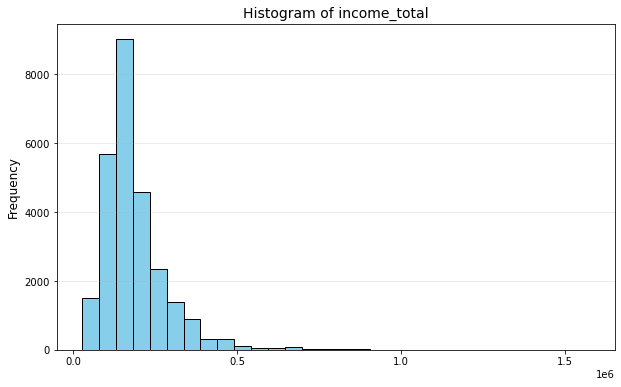

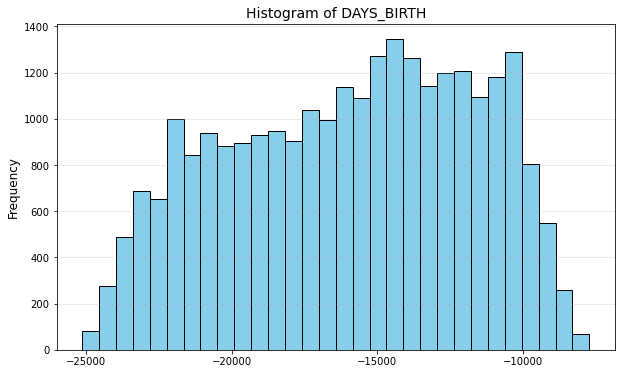

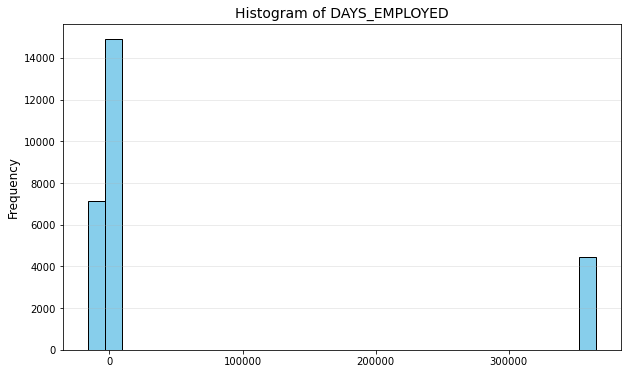

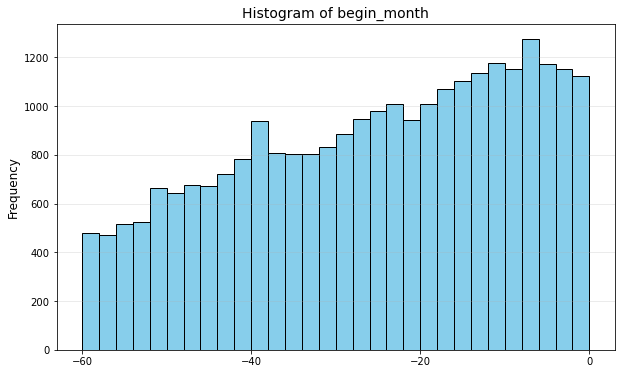

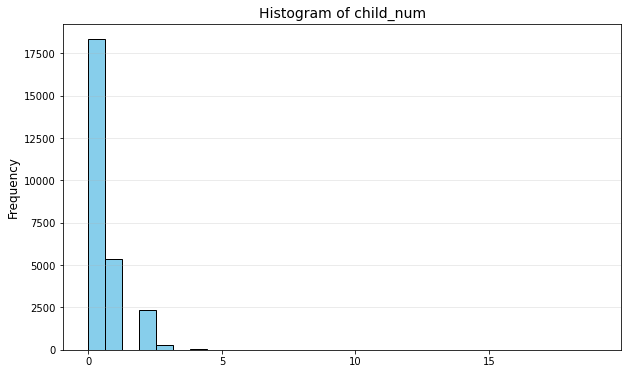

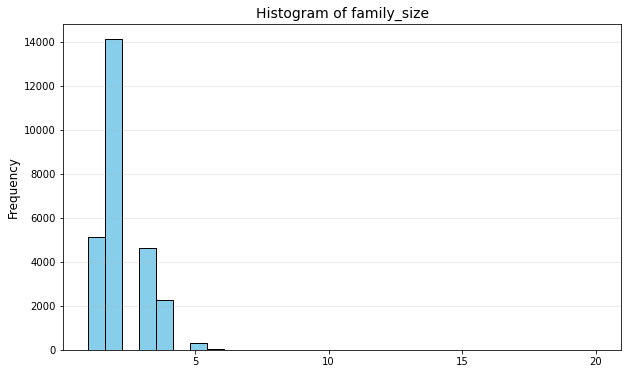

In [11]:
# Plot histograms for numerical features one by one
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    
    # Create histogram with matplotlib
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    # Reduce the number of x-axis tick marks to 5
    plt.locator_params(axis='x', nbins=5)  # Show approximately 5 tick marks on x-axis
    plt.title(f'Histogram of {col}', fontsize=14)
    #plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

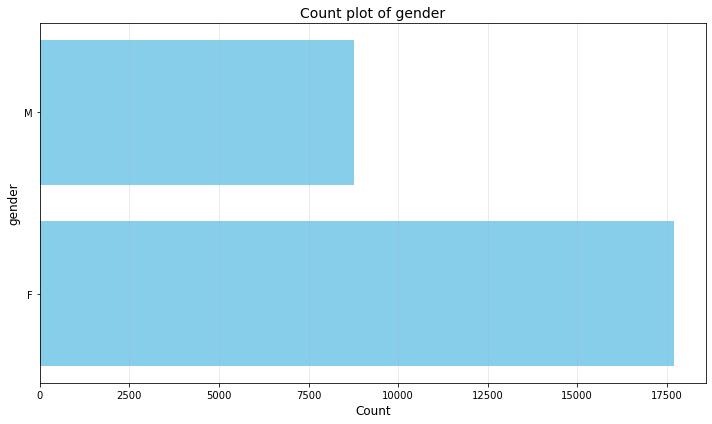

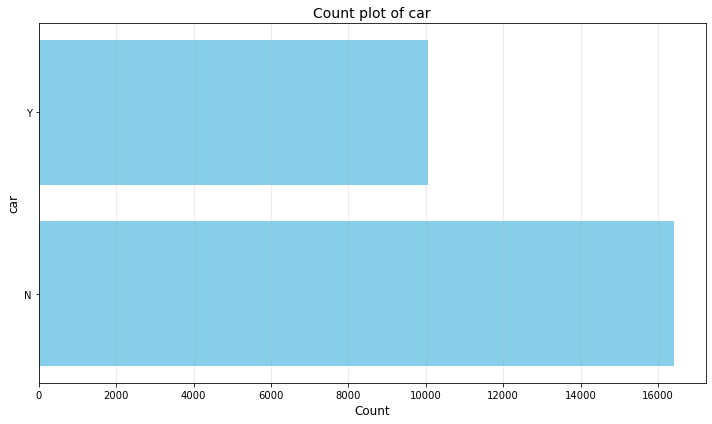

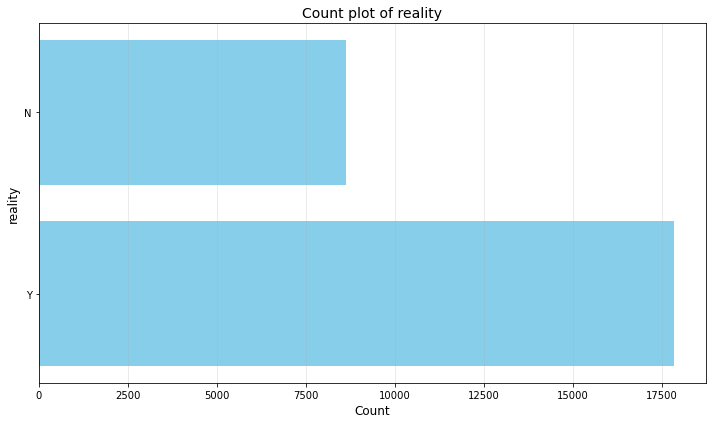

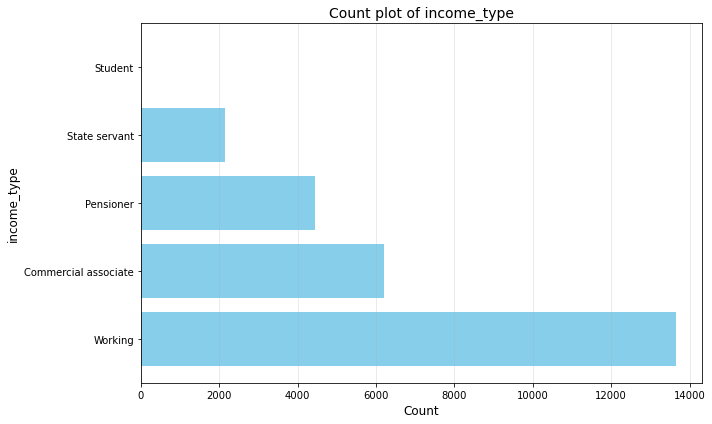

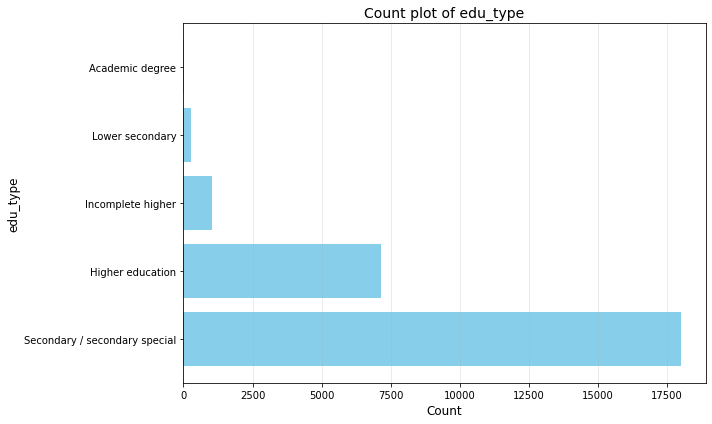

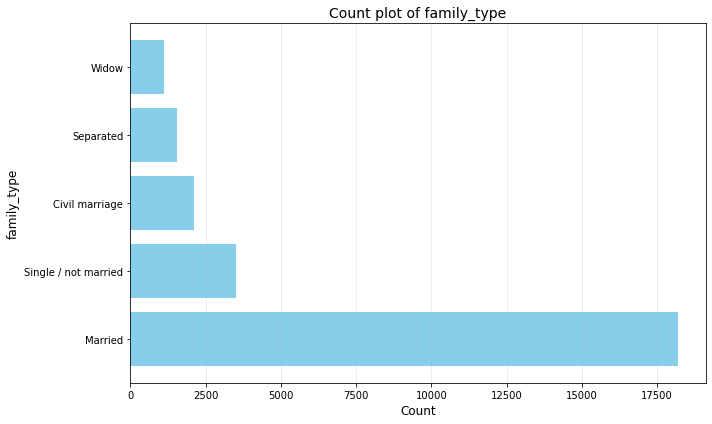

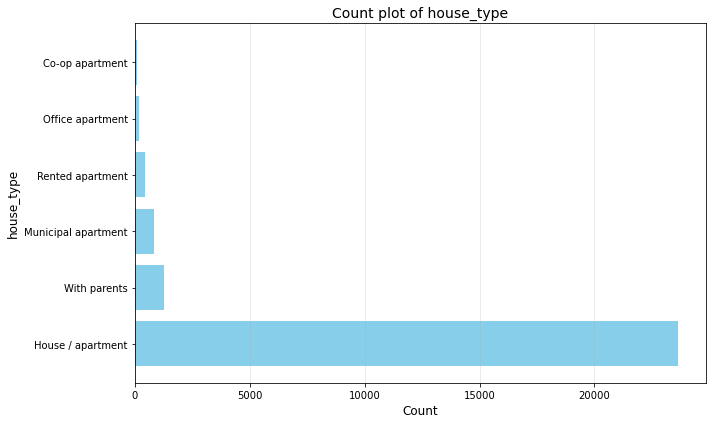

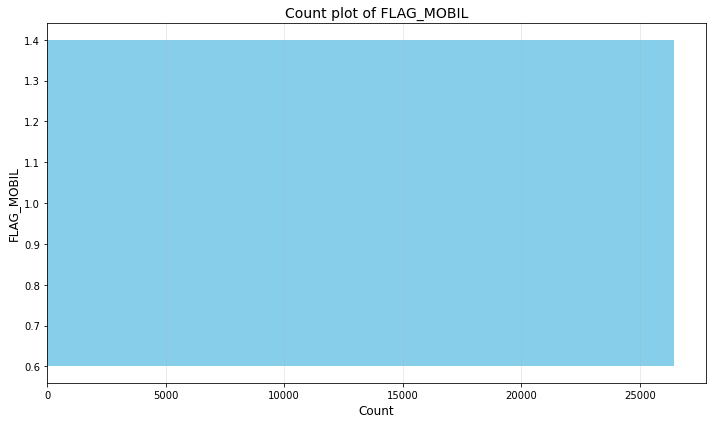

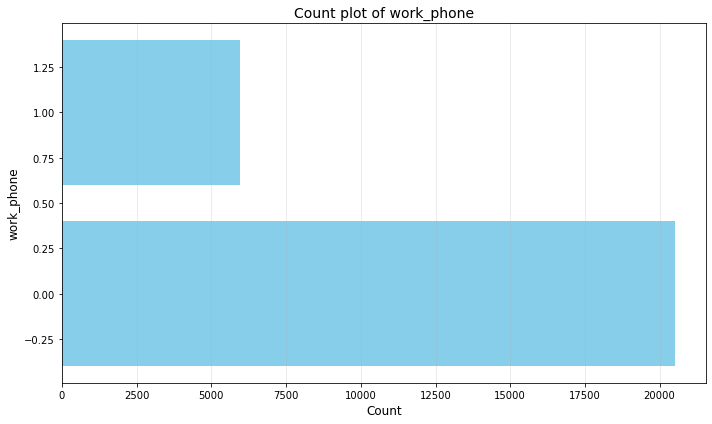

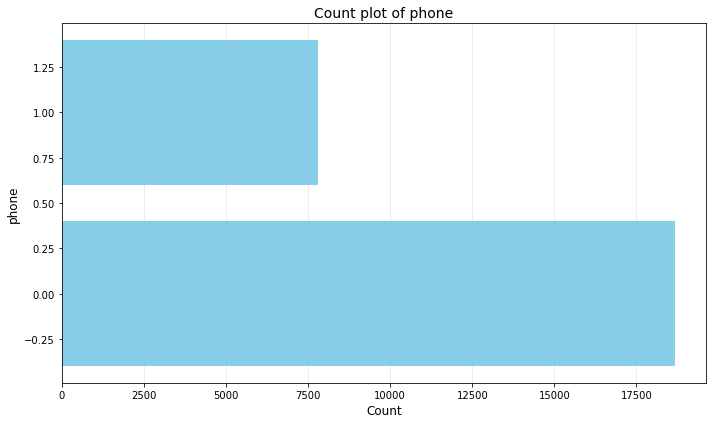

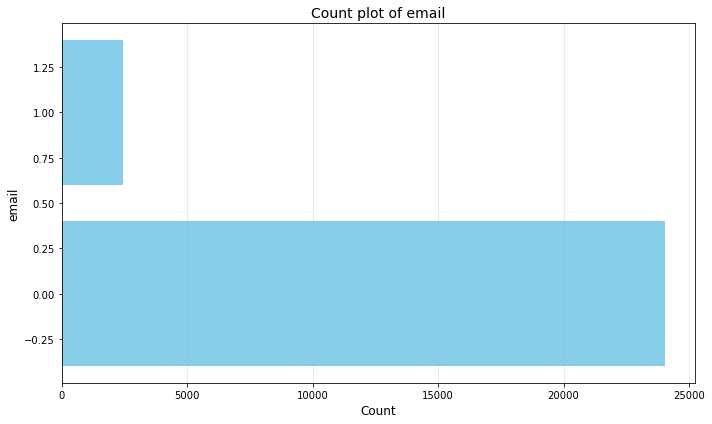

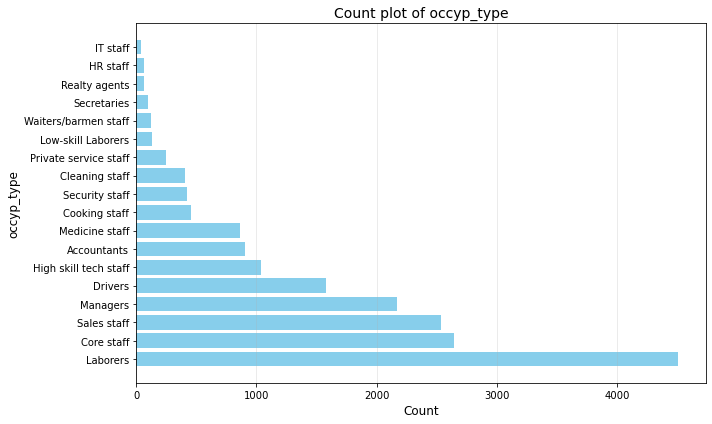

In [12]:
# Plot bar charts for categorical features
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    
    # Get the value counts
    value_counts = df[col].value_counts().sort_values(ascending=False)
    
    # Create horizontal bar chart
    plt.barh(y=value_counts.index, width=value_counts.values, color='skyblue')
    
    plt.title(f'Count plot of {col}', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# PREPROCESSING

In [13]:
# READ DATA AGAIN (reset DATA before Preprocessing)
train_path='/Users/0zour/study_data_science/HDAT_STUDY/dacon_clf_creditcard/train.csv'
test_path='/Users/0zour/study_data_science/HDAT_STUDY/dacon_clf_creditcard/test.csv'
sub_path='/Users/0zour/study_data_science/HDAT_STUDY/dacon_clf_creditcard/sample_submission.csv'
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)
df_sub=pd.read_csv(sub_path)

In [14]:
# Insight from EDA
numerical_features=['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'child_num', 'family_size']
categorical_features=['gender', 'car', 'reality',
       'income_type', 'edu_type', 'family_type', 'house_type',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type']
features_to_drop=['index']
target=['credit']

In [15]:
# Split target
# Split Train/ Val
# Drop meaningless features
y = df_train[target[0]]
X = df_train.drop(columns=target + features_to_drop)
X_test = df_test.drop(columns=features_to_drop)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Step 1: Impute missing values for numerical features with median from train set
num_imputer = SimpleImputer(strategy='median')
# Fit on train data only
num_imputer.fit(X_train[numerical_features])
# Transform train, validation and test data
X_train[numerical_features] = num_imputer.transform(X_train[numerical_features])
X_val[numerical_features] = num_imputer.transform(X_val[numerical_features])
X_test[numerical_features] = num_imputer.transform(X_test[numerical_features])

In [18]:
# Step 2: Impute missing values for categorical features with 'nan' string
for dataset in [X_train, X_val, X_test]:
    for col in categorical_features:
        dataset[col] = dataset[col].fillna('nan')

In [19]:
# Step 3: Apply StandardScaler to numerical features
scaler = StandardScaler()

# Fit on train data only
scaler.fit(X_train[numerical_features])

# Transform train, validation and test data
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [20]:
# Step 4: Apply OrdinalEncoder to categorical features
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train data only
encoder.fit(X_train[categorical_features])

# Transform train, validation and test data
X_train[categorical_features] = encoder.transform(X_train[categorical_features])
X_val[categorical_features] = encoder.transform(X_val[categorical_features])
X_test[categorical_features] = encoder.transform(X_test[categorical_features])

# MODEL SELECTION

In [21]:
# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [22]:
# Initialize and train the model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
# Make predictions
y_val_pred_lr = lr.predict(X_val)
# Calculate metrics
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)
print(val_acc_lr)

0.6365583270345175


/Users/0zour/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Initialize and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
# Make predictions
y_val_pred_dt = dt.predict(X_val)
# Calculate metrics
val_acc_dt = accuracy_score(y_val, y_val_pred_dt)
print(val_acc_dt)

0.6126228269085412


In [24]:
# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_val_pred_rf = rf.predict(X_val)
# Calculate metrics
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
print(val_acc_rf)

0.7026958931720837


In [25]:
# Initialize and train the model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
# Make predictions
y_val_pred_lgbm = lgbm.predict(X_val)
# Calculate metrics
val_acc_lgbm = accuracy_score(y_val, y_val_pred_lgbm)
print(val_acc_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 18519, number of used features: 17
[LightGBM] [Info] Start training from score -2.118142
[LightGBM] [Info] Start training from score -1.443119
[LightGBM] [Info] Start training from score -0.440747
0.6977828168304359


# HYPER PARAM TUNING

In [26]:
# Create base Random Forest model
best_model = RandomForestClassifier(random_state=42)

# Define parameter grid - we're keeping it reasonably small for faster execution
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy', # Use weighted F1 score for imbalanced datasets
    n_jobs=-1, # Use all available cores
    verbose= 1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(best_params)
print(best_score)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
0.7160214355414354


In [34]:
print(best_params)
print(best_score)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
0.7160214355414354


# SUBMISSION

In [49]:
df_sub=pd.read_csv(sub_path)
y_pred_test=best_model.predict(X_test)

In [50]:
print(y_pred_test)

[2. 2. 2. ... 2. 2. 2.]


In [51]:
print(set(y_pred_test))

{0.0, 1.0, 2.0}


In [52]:
df_sub.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


In [57]:
df_sub.columns

Index(['index', '0', '1', '2'], dtype='object')

In [55]:
# Get indices for each class
y_pred_test_array = np.array(y_pred_test)
indices_class_0 = np.where(y_pred_test_array == 0.0)[0].tolist()
indices_class_1 = np.where(y_pred_test_array == 1.0)[0].tolist()
indices_class_2 = np.where(y_pred_test_array == 2.0)[0].tolist()

for i in indices_class_0:
    df_sub.loc[i, '0'] = 1

# Set column 1 to 1 for rows where index is in indices_class_1
for i in indices_class_1:
    df_sub.loc[i, '1'] = 1

# Set column 2 to 1 for rows where index is in indices_class_2
for i in indices_class_2:
    df_sub.loc[i, '2'] = 1


In [56]:
df_sub

,index,0,1,2
0,26457,0,0,1
1,26458,0,0,1
2,26459,0,0,1
3,26460,0,0,1
4,26461,0,0,1
...,...,...,...,...
9995,36452,0,0,1
9996,36453,0,0,1
9997,36454,0,0,1
9998,36455,0,0,1
